In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as skdt
from sklearn.cluster import KMeans

In [2]:
fd = pd.read_csv('drug.csv')
fd.head()

,age,sex,bp,cholesterol,Na_to_K,drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


# Clustering

In [4]:
points = fd[['age','Na_to_K']]

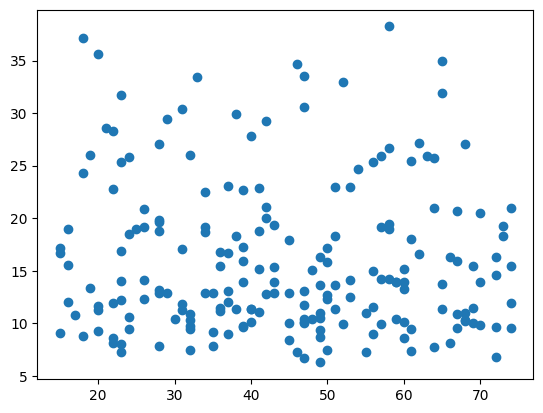

In [5]:
plt.scatter(points['age'], points['Na_to_K'])

In [6]:
model = KMeans(n_clusters=2)

In [7]:
model.fit(points)

KMeans(n_clusters=2)

In [8]:
labels = model.labels_

In [9]:
labels

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1])

# Evaluasi Hasil Pemodelan

In [11]:
fdKmeans = pd.DataFrame({'labels': labels, 'bp': fd.bp})

In [13]:
ct = pd.crosstab(fdKmeans["labels"], fdKmeans["bp"])
print(ct)

bp      HIGH  LOW  NORMAL
labels                   
0         34   36      31
1         43   29      28


# Melihat centroid dari model yang sudah dibuat

In [14]:
centroid = model.cluster_centers_

In [15]:
centroid

array([[58.30693069, 15.57708911],
       [30.14      , 16.5496    ]])

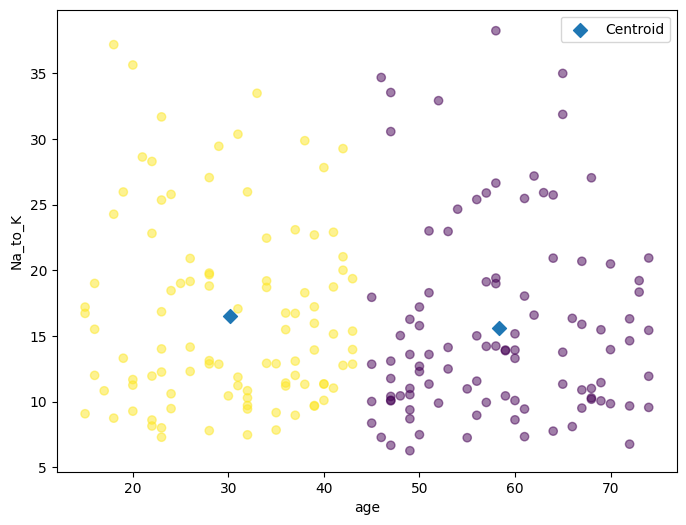

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(points['age'], points['Na_to_K'], alpha = .5, c = labels)
plt.scatter(centroid[:,0], centroid[:,1], marker = 'D', s = 50, label="Centroid")
plt.xlabel("age")
plt.ylabel("Na_to_K")
plt.legend()
plt.show()

# Menentukan Jumlah Cluster (Elbow Method)

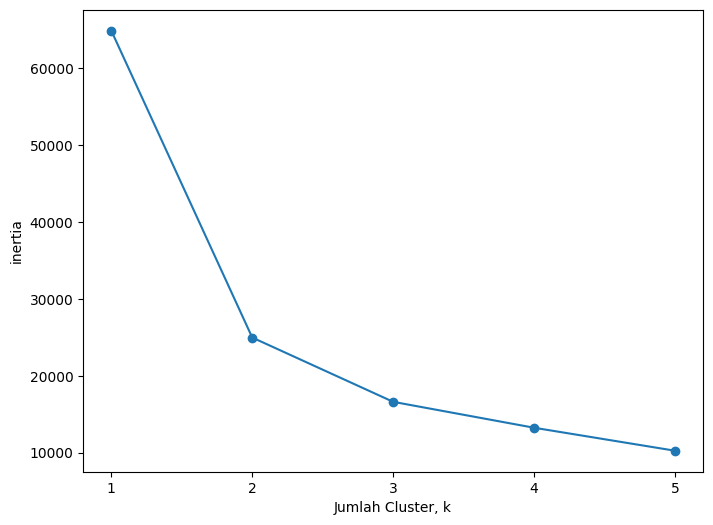

In [17]:
plt.figure(figsize=(8,6))
cluster_sum = range(1, 6)
inertia = []

for cluster in cluster_sum:
    model = KMeans(n_clusters = cluster)
    model.fit(points)
    inertia.append(model.inertia_)

plt.plot(cluster_sum, inertia, '-o')
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('inertia')
plt.xticks(cluster_sum)
plt.show()